In [2]:
import pandas as pd

# Load IMDb datasets
movies = pd.read_csv('title.basics.tsv', sep='\t', low_memory=False)
ratings = pd.read_csv('title.ratings.tsv', sep='\t', low_memory=False)

# Preview the datasets
print(movies.head())
print(ratings.head())


      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              5  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1                     Short  
      tconst  averageRating  numVotes
0  tt0000001            5.7      2149
1  tt0000002            5.5       291
2  tt0000003   

In [4]:
# INSPECT THE DATA FOR MISSING VALUES
# Check the structure
print(movies.info())
print(ratings.info())

# Check for missing values
print(movies.isnull().sum())
print(ratings.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11601729 entries, 0 to 11601728
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 796.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559864 entries, 0 to 1559863
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1559864 non-null  object 
 1   averageRating  1559864 non-null  float64
 2   numVotes       1559864 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 35.7+ MB
None
tconst              0
titleType           0
primaryTitle       19
originalTitle      19
isAdult             0
startYear  

In [6]:
#Handling the missing values
# Replace '\N' in genres with an empty string
movies['genres'] = movies['genres'].replace('\\N', '')

# Drop rows with critical missing values
movies = movies.dropna(subset=['primaryTitle'])

# Ensure ratings have no missing values
ratings = ratings.dropna()

In [8]:
print(movies.info())
print(movies.head())

<class 'pandas.core.frame.DataFrame'>
Index: 11601710 entries, 0 to 11601728
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 885.1+ MB
None
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894 

In [10]:
# Filter movies dataset to include only feature films
movies = movies[movies['titleType'] == 'movie']

# Filter movies with sufficient rating data
ratings = ratings[ratings['numVotes'] > 50]

# Merge datasets
merged_data = pd.merge(movies, ratings, on='tconst', how='inner')
print(merged_data.head())

      tconst titleType                    primaryTitle  \
0  tt0000009     movie                      Miss Jerry   
1  tt0000147     movie   The Corbett-Fitzsimmons Fight   
2  tt0000574     movie     The Story of the Kelly Gang   
3  tt0000679     movie  The Fairylogue and Radio-Plays   
4  tt0001112     movie                          Hamlet   

                    originalTitle isAdult startYear endYear runtimeMinutes  \
0                      Miss Jerry       0      1894      \N             45   
1   The Corbett-Fitzsimmons Fight       0      1897      \N            100   
2     The Story of the Kelly Gang       0      1906      \N             70   
3  The Fairylogue and Radio-Plays       0      1908      \N            120   
4                          Amleto       0      1910      \N             \N   

                       genres  averageRating  numVotes  
0                     Romance            5.4       222  
1      Documentary,News,Sport            5.3       556  
2  Action,A

In [12]:
# Split genres into a list
merged_data['genres'] = merged_data['genres'].str.split(',')

# Convert year to numeric
merged_data['startYear'] = pd.to_numeric(merged_data['startYear'], errors='coerce')

# Remove unnecessary columns
merged_data = merged_data[['tconst', 'primaryTitle', 'startYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes']]
print(merged_data.head())

      tconst                    primaryTitle  startYear runtimeMinutes  \
0  tt0000009                      Miss Jerry     1894.0             45   
1  tt0000147   The Corbett-Fitzsimmons Fight     1897.0            100   
2  tt0000574     The Story of the Kelly Gang     1906.0             70   
3  tt0000679  The Fairylogue and Radio-Plays     1908.0            120   
4  tt0001112                          Hamlet     1910.0             \N   

                           genres  averageRating  numVotes  
0                       [Romance]            5.4       222  
1      [Documentary, News, Sport]            5.3       556  
2  [Action, Adventure, Biography]            6.0       982  
3            [Adventure, Fantasy]            5.2        78  
4                         [Drama]            3.9        53  


In [14]:
#Save the cleaned dataset after merging the dataset and do everything like removing null values in each dataset and everything.
merged_data.to_csv('cleaned_imdb_data.csv', index=False)
print("Cleaned dataset saved to 'cleaned_imdb_data.csv'")


Cleaned dataset saved to 'cleaned_imdb_data.csv'


In [24]:
#Now load the cleaned Dataset
import pandas as pd

# Load cleaned data
data = pd.read_csv('cleaned_imdb_data.csv')

# Preview the data
print(data.head())
print(data.info())

      tconst                    primaryTitle  startYear runtimeMinutes  \
0  tt0000009                      Miss Jerry     1894.0             45   
1  tt0000147   The Corbett-Fitzsimmons Fight     1897.0            100   
2  tt0000574     The Story of the Kelly Gang     1906.0             70   
3  tt0000679  The Fairylogue and Radio-Plays     1908.0            120   
4  tt0001112                          Hamlet     1910.0             \N   

                                 genres  averageRating  numVotes  
0                           ['Romance']            5.4       222  
1      ['Documentary', 'News', 'Sport']            5.3       556  
2  ['Action', 'Adventure', 'Biography']            6.0       982  
3              ['Adventure', 'Fantasy']            5.2        78  
4                             ['Drama']            3.9        53  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176688 entries, 0 to 176687
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype

In [26]:
# Basic statistics for numerical columns for normalizing the data by standard deviation,variance like that.
print(data.describe())

# Check unique genres what are present in the dataset.
unique_genres = set([genre for sublist in data['genres'].dropna().apply(eval) for genre in sublist])
print(f"Unique Genres: {unique_genres}")


           startYear  averageRating      numVotes
count  176678.000000  176688.000000  1.766880e+05
mean     1997.457844       5.974330  6.738061e+03
std        25.152551       1.281124  4.995879e+04
min      1894.000000       1.000000  5.100000e+01
25%      1983.000000       5.200000  1.080000e+02
50%      2007.000000       6.100000  2.710000e+02
75%      2017.000000       6.900000  1.056000e+03
max      2025.000000      10.000000  3.034312e+06
Unique Genres: {'', 'Horror', 'History', 'Western', 'Sport', 'Fantasy', 'Adult', 'Animation', 'Biography', 'Film-Noir', 'Romance', 'Documentary', 'News', 'Family', 'Music', 'Talk-Show', 'Thriller', 'Mystery', 'Game-Show', 'Adventure', 'Sci-Fi', 'Action', 'Musical', 'War', 'Comedy', 'Crime', 'Drama', 'Reality-TV'}


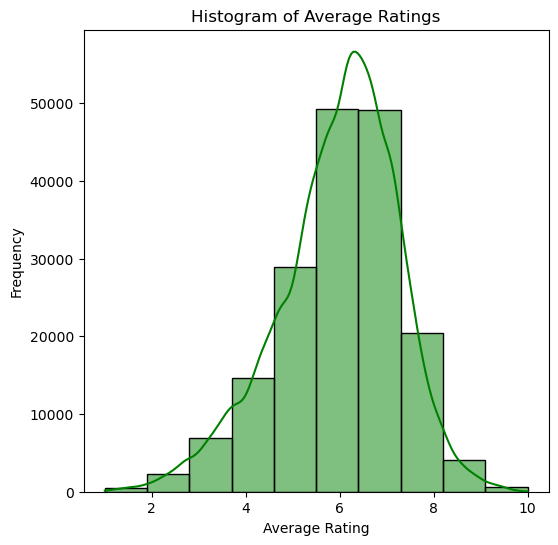

In [43]:
#visualization
#Shows how average ratings are distributed across movies — a histogram with a KDE (density curve)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of average ratings
plt.figure(figsize=(6,6))
sns.histplot(data['averageRating'], bins=10, kde=True, color='green')
plt.title('Histogram of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

C:\Users\scbhi\AppData\Local\Temp\ipykernel_22120\1472883110.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()), palette='pastel')


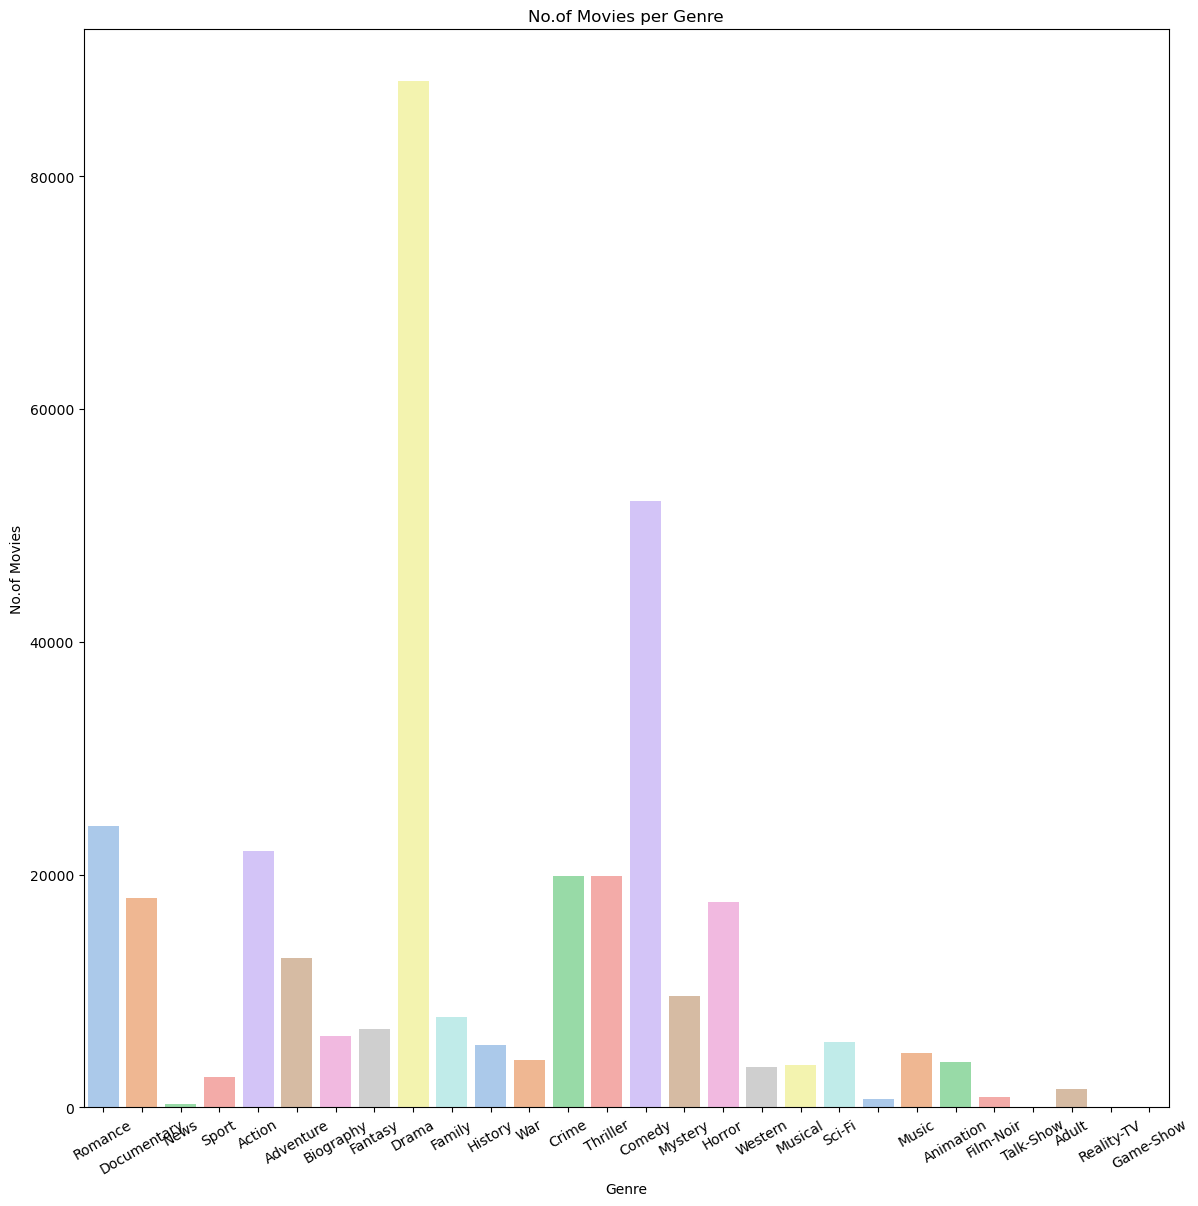

In [45]:
#Bar chart for visualizing comparison between genre and number of movies per genre
from collections import Counter

# Count genres
all_genres = [genre for sublist in data['genres'].dropna().apply(eval) for genre in sublist]
genre_counts = Counter(all_genres)

# Plot genres
plt.figure(figsize=(14,14))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()), palette='pastel')
plt.title('No.of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('No.of Movies')
plt.xticks(rotation=30)
plt.show()

                                             primaryTitle  averageRating  \
145526                          Nenapugala Maathu Madhura           10.0   
102337                                      A Better Life            9.9   
139604                                         Aamar Boss            9.9   
110744                              Pyar Kiya Toh Nibhana            9.9   
135448                                      Dheera Samrat            9.8   
126084                                   Dancing with Mom            9.8   
136242                    Kalrav (Sound of running water)            9.8   
141175                                    Love God's Will            9.8   
139976  Bittersweet Memories: 14 Dias Isolados Para Fa...            9.8   
147168                                                Bad            9.8   

        numVotes  
145526       207  
102337        65  
139604        82  
110744       116  
135448        99  
126084        67  
136242        63  
141175     

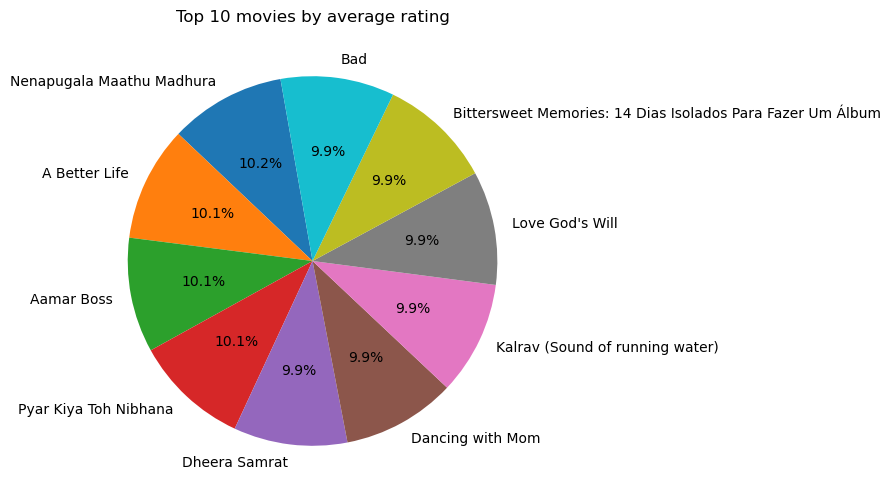

In [57]:
# Top 10 highest-rated movies
top_movies = data.sort_values(by='averageRating', ascending=False).head(10)
print(top_movies[['primaryTitle', 'averageRating', 'numVotes']])

#pie chart representation for top-10 rated movies
top_movies = data.sort_values(by='averageRating', ascending=False).head(10)

# Pie chart of the top 10 movies' average ratings
plt.figure(figsize=(6, 6))
plt.pie(top_movies['averageRating'], labels=top_movies['primaryTitle'], autopct='%1.1f%%', startangle=100)
plt.title('Top 10 movies by average rating')
plt.show()

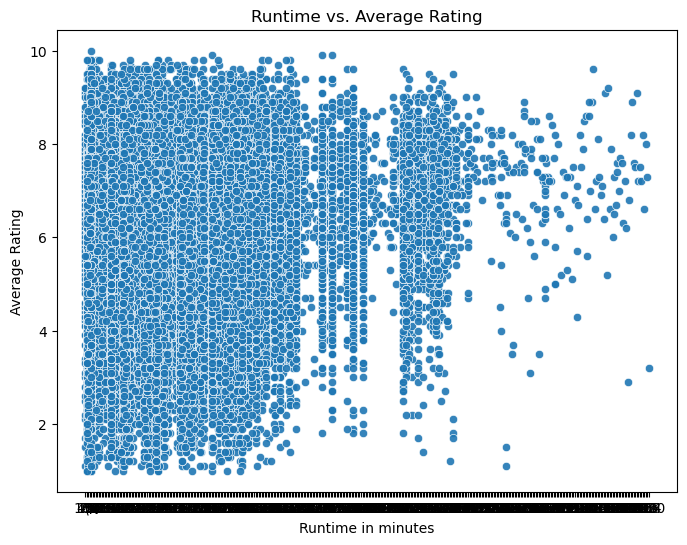

In [55]:
# Scatter plot for runtime vs. average rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['runtimeMinutes'], y=data['averageRating'], alpha=0.9)
plt.title('Runtime vs. Average Rating')
plt.xlabel('Runtime in minutes')
plt.ylabel('Average Rating')
plt.show()

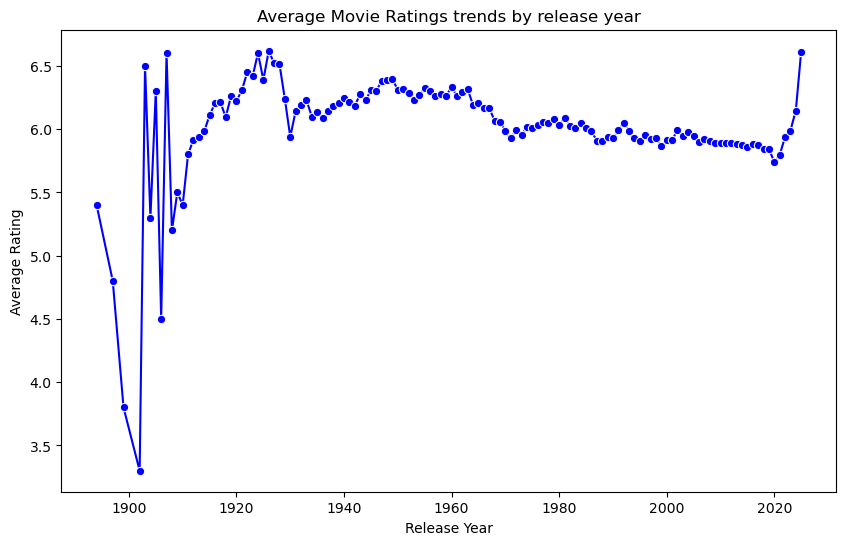

In [61]:
# Average rating by release year
yearly_ratings = data.groupby('startYear')['averageRating'].mean()

# Plot trends
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_ratings.index, y=yearly_ratings.values, marker='o', color='blue')
plt.title('Average Movie Ratings trends by release year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.show()


In [74]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

# Convert genres into transaction-like format
mlb = MultiLabelBinarizer()
genre_matrix = pd.DataFrame(
    mlb.fit_transform(data['genres'].dropna().apply(eval)),
    columns=mlb.classes_,
    index=data.index
)

# Apply FP-Growth algorithm
frequent_itemsets = fpgrowth(genre_matrix, min_support=0.05, use_colnames=True)
print(frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print(rules)

# Display top rules by lift
rules.sort_values('lift', ascending=False).head(10)



     support           itemsets
0   0.136704          (Romance)
1   0.102016      (Documentary)
2   0.124802           (Action)
3   0.072653        (Adventure)
4   0.499242            (Drama)
5   0.112651            (Crime)
6   0.112419         (Thriller)
7   0.294785           (Comedy)
8   0.054175          (Mystery)
9   0.099752           (Horror)
10  0.084318   (Drama, Romance)
11  0.057916  (Comedy, Romance)
12  0.065341     (Drama, Crime)
13  0.095768    (Drama, Comedy)
  antecedents consequents  antecedent support  consequent support   support  \
0     (Drama)   (Romance)            0.499242            0.136704  0.084318   
1   (Romance)     (Drama)            0.136704            0.499242  0.084318   
2    (Comedy)   (Romance)            0.294785            0.136704  0.057916   
3   (Romance)    (Comedy)            0.136704            0.294785  0.057916   
4     (Drama)     (Crime)            0.499242            0.112651  0.065341   
5     (Crime)     (Drama)            0.112651 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3,(Romance),(Comedy),0.136704,0.294785,0.057916,0.423657,1.437171,1.0,0.017617,1.223602,0.352357,0.155031,0.182741,0.310062
2,(Comedy),(Romance),0.294785,0.136704,0.057916,0.196467,1.437171,1.0,0.017617,1.074375,0.431341,0.155031,0.069227,0.310062
0,(Drama),(Romance),0.499242,0.136704,0.084318,0.168892,1.235458,1.0,0.016070,1.038729,0.380590,0.152853,0.037285,0.392842
1,(Romance),(Drama),0.136704,0.499242,0.084318,0.616792,1.235458,1.0,0.016070,1.306754,0.220763,0.152853,0.234745,0.392842
4,(Drama),(Crime),0.499242,0.112651,0.065341,0.130881,1.161831,1.0,0.009101,1.020976,0.278157,0.119552,0.020545,0.355458
5,(Crime),(Drama),0.112651,0.499242,0.065341,0.580034,1.161831,1.0,0.009101,1.192379,0.156972,0.119552,0.161340,0.355458


C:\Users\scbhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2560 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


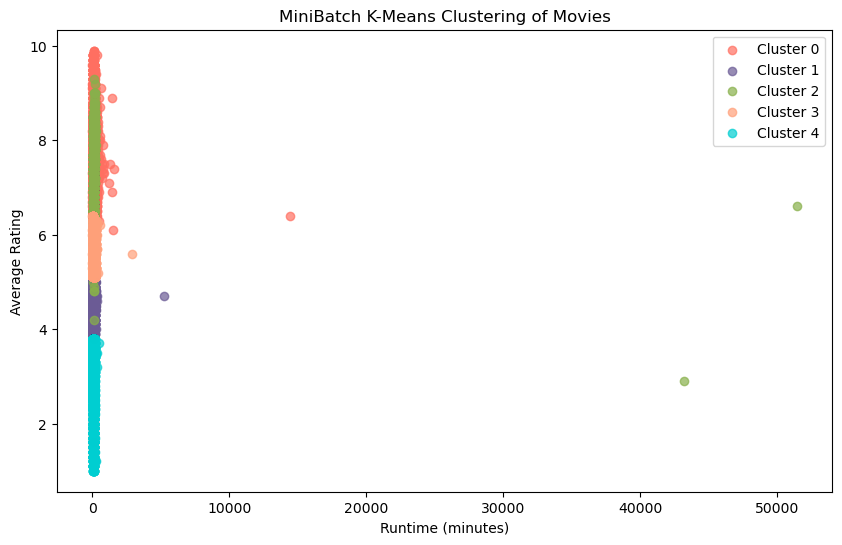

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Clean the data
data['runtimeMinutes'] = pd.to_numeric(data['runtimeMinutes'].replace('\\N', np.nan), errors='coerce')
data['averageRating'] = pd.to_numeric(data['averageRating'], errors='coerce')
data['numVotes'] = pd.to_numeric(data['numVotes'], errors='coerce')

# Drop rows with missing values in the selected features
features = data[['averageRating', 'runtimeMinutes', 'numVotes']].dropna()

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply MiniBatch K-Means clustering
mini_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=100)
clusters = mini_kmeans.fit_predict(scaled_features)

# Add cluster labels to the data
features['Cluster'] = clusters

# Custom color palette (you can use more or fewer colors depending on clusters)
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#FFA07A', '#00CED1']

# Plot with custom colors
plt.figure(figsize=(10, 6))
for cluster_id in sorted(features['Cluster'].unique()):
    cluster_data = features[features['Cluster'] == cluster_id]
    plt.scatter(cluster_data['runtimeMinutes'], cluster_data['averageRating'],
                label=f'Cluster {cluster_id}', color=colors[cluster_id], alpha=0.7)

plt.legend()
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.title('MiniBatch K-Means Clustering of Movies')
plt.show()


In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Preprocess the genres column by removing special characters and converting to strings
# Use 'genres' instead of 'description' if that's the actual column name
data['genres_cleaned'] = data['genres'].str.replace(r"[^\w\s,]", "", regex=True).str.lower()

# Create the TF-IDF matrix
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['genres_cleaned'])

# Define the recommendation function
def recommend_by_title(title, data=data, tfidf_matrix=tfidf_matrix, n_neighbors=2):
    try:
        idx = data[data['primaryTitle'] == title].index[0]
    except IndexError:
        return f"Title '{title}' not found in the dataset."
    
    nn = NearestNeighbors(n_neighbors=n_neighbors + 1, metric='cosine')
    nn.fit(tfidf_matrix)
    distances, indices = nn.kneighbors(tfidf_matrix[idx:idx+1])
    
    # Skip the first index (itself) and return recommendations
    similar_movie_indices = indices[0][1:]
    return data['primaryTitle'].iloc[similar_movie_indices].tolist()

# Get recommendations for 'Cleopatra'
recommendations = recommend_by_title('Cleopatra', data, tfidf_matrix)
print(recommendations)


['Quo Vadis?', 'The Count of Monte Cristo']


In [104]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Get the cluster centroids
centroids = mini_kmeans.cluster_centers_

# Calculate the Euclidean distance between each data point and its assigned centroid
distances = np.linalg.norm(scaled_features - centroids[clusters], axis=1)

# Calculate RMSE
rmse = np.sqrt(np.mean(distances**2))

# Calculate MAE
mae = np.mean(np.abs(distances))

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')



RMSE: 1.2631907455190812
MAE: 0.4041234773307679


In [106]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Simulated ground truth (e.g., genres or movies that users interacted with)
ground_truth = [
    {'Action', 'Adventure'},  # User 1
    {'Drama', 'Romance'},     # User 2
    {'Comedy'},               # User 3
]

# Simulated recommendations generated from association rules
recommendations = [
    {'Action', 'Adventure', 'Fantasy'},  # Recommendations for User 1
    {'Drama', 'Romance', 'Thriller'},    # Recommendations for User 2
    {'Comedy', 'Family'}                 # Recommendations for User 3
]

# Flatten ground truth and recommendations for evaluation
true_positives = sum(len(gt & rec) for gt, rec in zip(ground_truth, recommendations))
false_positives = sum(len(rec - gt) for gt, rec in zip(ground_truth, recommendations))
false_negatives = sum(len(gt - rec) for gt, rec in zip(ground_truth, recommendations))

# Precision, Recall, and F1-Score
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.62
Recall: 1.00
F1-Score: 0.77


In [108]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

# Simulate ratings for each movie (for example purposes)
data['ratings'] = np.random.uniform(1, 5, size=len(data))  # Random ratings between 1 and 5

# If genres are in a string format, split them into a list
data['genres_cleaned'] = data['genres_cleaned'].apply(lambda x: x.split() if isinstance(x, str) else x)

# One-hot encode the 'genres_cleaned' column using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_matrix = pd.DataFrame(mlb.fit_transform(data['genres_cleaned']),
                            columns=mlb.classes_,
                            index=data.index)

# Define features (genre matrix) and target (ratings)
X = genre_matrix
y = data['ratings']

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Calculate MAE
mae = mean_absolute_error(y, y_pred)

# Print RMSE and MAE
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(genre_matrix.head())

RMSE: 1.16
MAE: 1.00
   action  action,  adult  adult,  adventure  adventure,  animation  \
0       0        0      0       0          0           0          0   
1       0        0      0       0          0           0          0   
2       0        1      0       0          0           1          0   
3       0        0      0       0          0           1          0   
4       0        0      0       0          0           0          0   

   animation,  biography  biography,  ...  scifi  scifi,  sport  sport,  \
0           0          0           0  ...      0       0      0       0   
1           0          0           0  ...      0       0      1       0   
2           0          1           0  ...      0       0      0       0   
3           0          0           0  ...      0       0      0       0   
4           0          0           0  ...      0       0      0       0   

   talkshow  thriller  thriller,  war  war,  western  
0         0         0          0    0     0   

In [110]:
# Define features (genres) and target (ratings)
X = genre_matrix
y = data['ratings']

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Calculate MAE
mae = mean_absolute_error(y, y_pred)

# Print RMSE and MAE
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")



RMSE: 1.16
MAE: 1.00
